In [1]:
# !/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on 20180707

@author: zhangji
"""

%pylab inline
pylab.rcParams['figure.figsize'] = (18.5, 10.5)

import matplotlib
matplotlib.rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{mathtools, bm}"]

import numpy as np
import pandas as pd
import post_support_fun as psf
import os
import glob
from matplotlib import pyplot as plt
from IPython.display import display, HTML
from scanf import scanf

PWD = os.getcwd()
fontsize = 40
np.set_printoptions(linewidth=110, precision=5)

Populating the interactive namespace from numpy and matplotlib


In [2]:
# check convergence1, infspace

t_dir = PWD
txt_names = glob.glob('*.txt')

epsilon = []
nnode = []
resistance = []
rs = []

for txt_name in txt_names:
    with open(txt_name, 'r') as ftxt:
        FILE_DATA = ftxt.read()
    
    text_headle = 'force nodes'
    temp1 = psf.read_array(text_headle, FILE_DATA, array_length=1)
    nnode.append(temp1)
    
    text_headle = 'epsilon: '
    temp1 = psf.read_array(text_headle, FILE_DATA, array_length=1)
    epsilon.append(temp1)
    
    text_headle = 'sphere radius: '
    temp1 = psf.read_array(text_headle, FILE_DATA, array_length=1)
    rs.append(temp1)
    
    text_headle = 'Resultant at z axis is \[ '
    temp1 = psf.read_array(text_headle, FILE_DATA, array_length=3)
    resistance.append(temp1)

resistance = np.vstack(resistance).T
data_sphereInPipe = pd.DataFrame({'epsilon': np.hstack(epsilon), 
                    'nnode': np.hstack(nnode), 
                    'rs': np.hstack(rs), 
                    'Fx': resistance[0], 
                    'Fy': resistance[1], 
                    'Fz': resistance[2]})\
        .pivot_table(index=['nnode', 'epsilon'], columns=['rs'])

data = data_sphereInPipe
resFz = data.Fz

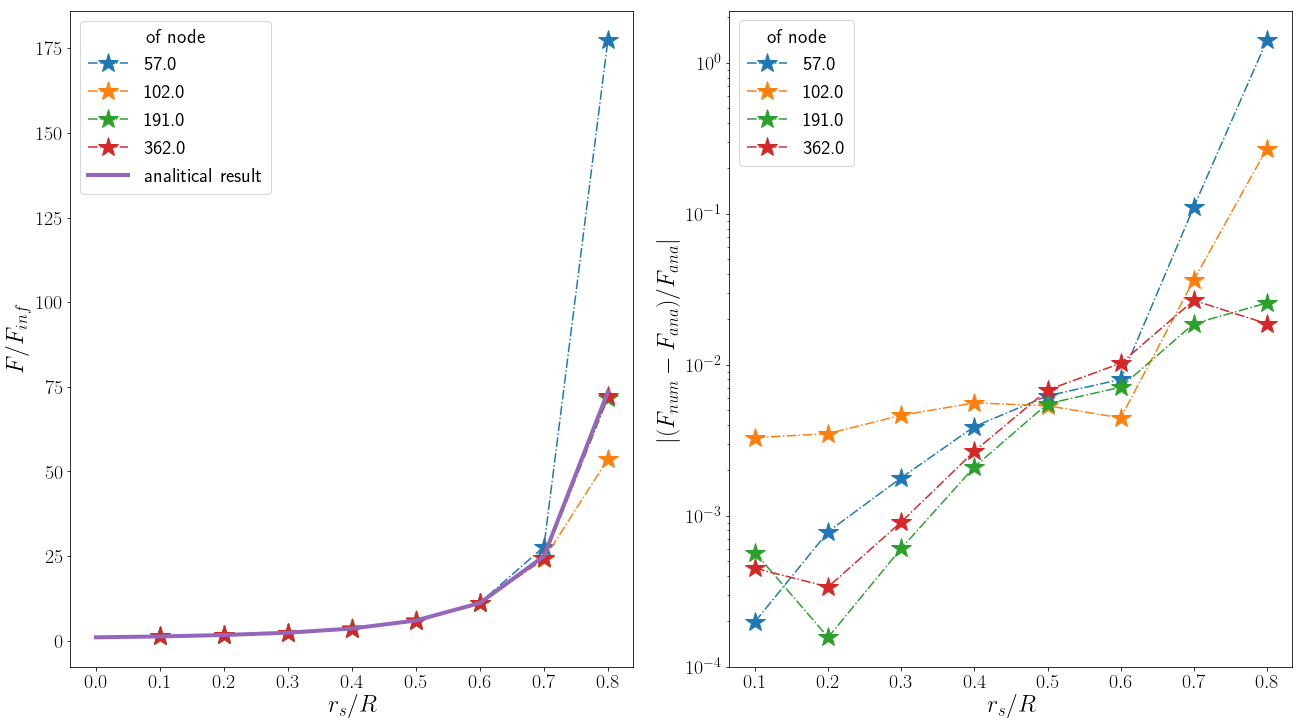

In [4]:
ana_rs = np.arange(0, 0.9, 0.1)
ana_Fz = np.array([1.000, 1.263, 1.680, 2.371, 3.596, 5.970, 11.135, 24.955, 73.555])
for es in resFz.index.levels[1][[2]]:
#     fig, ax1 = plt.subplots(nrows=1, ncols=1)
    fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2)
    fig.patch.set_facecolor('white')    
    for nnode in resFz.index.levels[0][[0, 1, 2, 3]]:
#     for nnode in resFz.index.levels[0]:
        tx = resFz.loc[nnode].loc[es]
        ty = tx.index
        ax1.plot(ty, tx, '-.*', label=nnode, ms=fontsize*0.5)
        ax2.plot(ty, np.abs((tx - ana_Fz[1:])/ana_Fz[1:]), '-.*', label=nnode, ms=fontsize*0.5)
    
    ax1.plot(ana_rs, ana_Fz, '-', linewidth=fontsize*0.1, label='analitical result')
    ax1.legend()
    ax1.legend(fontsize=fontsize*0.5)
    ax1.get_legend().set_title('# of node', prop = {'size':fontsize*0.5})
#     ax1.set_title(es)
#     ax1.set_ylim(-5, 85)
    ax1.set_xlabel('$r_s/R$', fontsize=fontsize*0.6)
    ax1.set_ylabel('$F/F_{inf}$', fontsize=fontsize*0.6)
    plt.sca(ax1)
    plt.xticks(fontsize=fontsize*0.5)
    plt.yticks(fontsize=fontsize*0.5)
    
    ax2.set_yscale('log')
    ax2.legend()
    ax2.legend(fontsize=fontsize*0.5)
    ax2.get_legend().set_title('# of node', prop = {'size':fontsize*0.5})
    ax2.set_xlabel('$r_s/R$', fontsize=fontsize*0.6)
    ax2.set_ylabel('$|(F_{num}-F_{ana})/F_{ana}|$', fontsize=fontsize*0.6)
    plt.sca(ax2)
    plt.xticks(fontsize=fontsize*0.5)
    plt.yticks(fontsize=fontsize*0.5)

plt.tight_layout()
plt.savefig('fig_sphereInPipe.pdf', format='pdf')

In [7]:
resFz.index.levels[1][[2]]

Float64Index([-1.0], dtype='float64', name='epsilon')

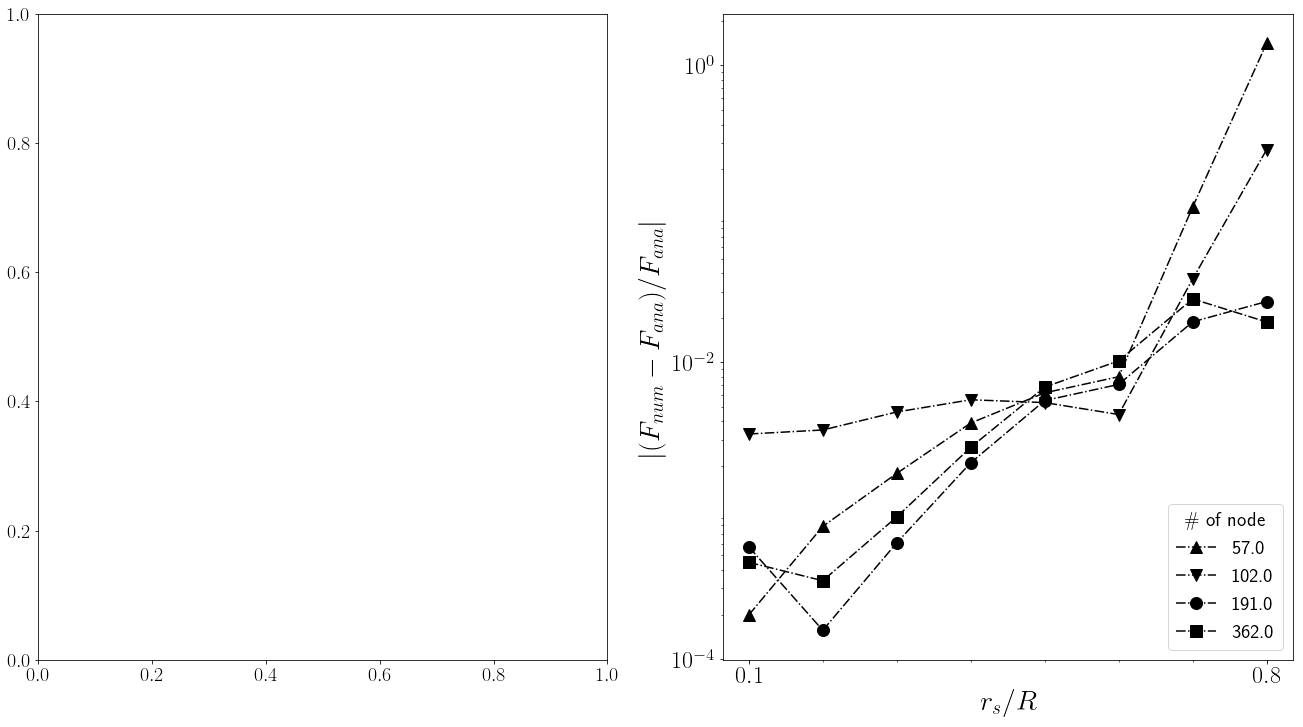

In [6]:
ana_rs = np.arange(0, 0.9, 0.1)
ana_Fz = np.array([1.000, 1.263, 1.680, 2.371, 3.596, 5.970, 11.135, 24.955, 73.555])
linestyle_list = ['^-.', 'v-.', 'o-.', 's-.', 'd-.', '<-.', '>-.']
for es in resFz.index.levels[1][[2]]:
#     fig = plt.figure(figsize=(9.5, 10.5))
    fig = plt.figure()
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    fig.patch.set_facecolor('white')
    
    for nnode, lsi in zip( resFz.index.levels[0][[0, 1, 2, 3]], linestyle_list):
#     for nnode in resFz.index.levels[0]:
        tx = resFz.loc[nnode].loc[es]
        ty = tx.index
        ax2.plot(ty, np.abs((tx - ana_Fz[1:])/ana_Fz[1:]), lsi, label=nnode, ms=fontsize*0.3, color='k')
    
    ax2.set_yscale('log')
    ax2.xaxis.set_ticks(np.array((0.1, 0.8)))
    ax2.xaxis.set_minor_locator(MultipleLocator(1e-1))
    ax2.yaxis.set_ticks(np.array((10**-4, 10**-2, 10**0)))
    ax2.legend(loc=4, fontsize=fontsize*0.5)
    ax2.get_legend().set_title('\# of node', prop = {'size':fontsize*0.5})
    ax2.set_xlabel('$r_s/R$', fontsize=fontsize*0.7)
    ax2.set_ylabel('$|(F_{num}-F_{ana})/F_{ana}|$', fontsize=fontsize*0.7)
    plt.sca(ax2)
    plt.xticks(fontsize=fontsize*0.6)
    plt.yticks(fontsize=fontsize*0.6)
    
plt.tight_layout()
# parentDirectory = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
# tpath = os.path.join(parentDirectory, 'fig_sphereInPipe2.pdf')
# plt.savefig(tpath, format='pdf')